In [93]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [94]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [95]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [96]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [97]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [98]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [99]:
# Save references to each table
Measurement = Base.classes.measurement

In [100]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [101]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [102]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database make sure dates in utf-8 format 
recent_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
print(recent_date)


2017-08-23 00:00:00


In [103]:
# Calculate the date one year from the last date in data set.
last_date = recent_date - dt.timedelta(days=365)
#print(last_date)

In [104]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_date).\
    order_by(Measurement.date).all()
#print(precipitation)


[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.05), ('2016-08-31', 0.13), (

In [105]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])
precipitation_df.head()

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [106]:
# Sort the dataframe by date
precipitation_df.set_index('Date', inplace=True)
precipitation_df.head()


,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [109]:
#convert dates to datetime format in US hawaii time zone - so we are not stuck in 1970s unix time
precipitation_df.index = pd.to_datetime(precipitation_df.index, format='%Y-%m-%d')

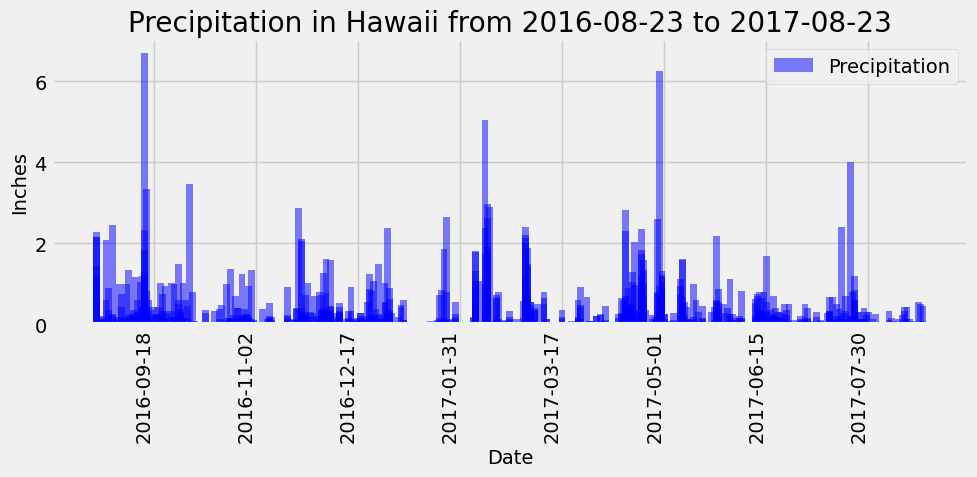

In [115]:
# Use Pandas Plotting with Matplotlib to plot the data

#group x_axis by date and sort from the earliest date to the latest date
x_axis = precipitation_df.index
y_axis = precipitation_df['Precipitation']

plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, width=3, color='blue', alpha=0.5, align="center", label='Precipitation')

# Set the locator and formatter for x-axis ticks to show labels every 45 days --> Thank you Chat GPT!
locator = mdates.DayLocator(interval=45)
formatter = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate(rotation=90)

plt.title("Precipitation in Hawaii from 2016-08-23 to 2017-08-23")
plt.xlabel("Date")
plt.ylabel("Inches")

plt.legend()
plt.tight_layout()
plt.show()


In [113]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [117]:
# Design a query to calculate the total number of stations in the dataset
unique_stations = session.query(Measurement.station).distinct().count()
print(f'There are {unique_stations} stations in the dataset.')

There are 9 unique stations in the dataset.


In [118]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_measurements = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc())
for station in station_measurements:
    print(station)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [120]:
# Using the most active station id from the previous query, calculate lowest, highest, and average temperature.

most_active_station = session.query(func.min(Measurement.tobs),
                                    func.max(Measurement.tobs),
                                    func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(most_active_station)

[(54.0, 85.0, 71.66378066378067)]


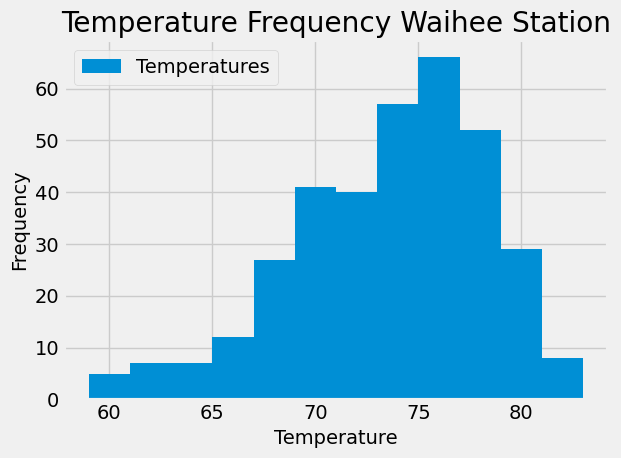

In [122]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_tobs = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= last_date).all()

most_active_station_tobs_df = pd.DataFrame(most_active_station_tobs, columns=['Temperatures'])
most_active_station_tobs_df.head()

most_active_station_tobs_df.plot.hist(bins=12, title="Temperature Frequency Waihee Station")
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()


# Close Session

In [16]:
# Close Session
session.close()